In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn
import sklearn.metrics as met
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv")

In [ ]:
unique_columns = []

for column in df.columns:
    if df[column].nunique() == len(df):
        unique_columns.append(column)


In [ ]:
df

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [ ]:
df = df.drop(columns=['Port Propeller Torque'])

In [ ]:
df

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21624.934,1924.342,8470.013,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18,29763.213,2306.745,8800.352,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21,39003.867,2678.052,9120.889,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24,50992.579,3087.434,9300.274,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [ ]:
df.head(10)

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
5,6.175,18,29792.731,2307.404,8828.360,246.278,800.434,288,676.397,2.501,0.998,13.356,1.030,35.760,0.708,0.95,0.975
6,7.148,21,38982.180,2678.086,9132.429,332.077,854.747,288,699.954,2.963,0.998,15.679,1.035,45.881,0.908,0.95,0.975
7,8.206,24,50996.808,3087.561,9318.562,437.989,952.122,288,741.770,3.576,0.998,18.632,1.040,62.440,1.236,0.95,0.975
8,9.300,27,72763.329,3560.395,9778.528,644.905,1115.797,288,789.094,4.498,0.998,22.811,1.049,92.556,1.832,0.95,0.975
9,1.138,3,379.880,1355.375,6683.916,7.915,464.017,288,550.985,1.100,0.998,5.963,1.019,3.879,0.079,0.95,0.976


In [ ]:
df.shape

(11934, 17)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21624.934,1924.342,8470.013,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18,29763.213,2306.745,8800.352,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21,39003.867,2678.052,9120.889,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24,50992.579,3087.434,9300.274,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11934 entries, 0 to 11933
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Lever position                                11934 non-null  float64
 1   Ship speed                                    11934 non-null  int64  
 2   Gas Turbine (GT) shaft torque                 11934 non-null  float64
 3   GT rate of revolutions                        11934 non-null  float64
 4   Gas Generator rate of revolutions             11934 non-null  float64
 5   Starboard Propeller Torque                    11934 non-null  float64
 6   Hight Pressure (HP) Turbine exit temperature  11934 non-null  float64
 7   GT Compressor inlet air temperature           11934 non-null  int64  
 8   GT Compressor outlet air temperature          11934 non-null  float64
 9   HP Turbine exit pressure                      11934 non-null 

In [ ]:
df.describe()

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [ ]:
cols = df.columns

In [ ]:
print (cols)

Index(['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
       'GT rate of revolutions', 'Gas Generator rate of revolutions',
       'Starboard Propeller Torque',
       'Hight Pressure (HP) Turbine exit temperature',
       'GT Compressor inlet air temperature',
       'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
       'GT Compressor inlet air pressure', 'GT Compressor outlet air pressure',
       'GT exhaust gas pressure', 'Turbine Injecton Control', 'Fuel flow',
       'GT Compressor decay state coefficient',
       'GT Turbine decay state coefficient '],
      dtype='object')


In [ ]:
df.isnull().sum()

Lever position                                  0
Ship speed                                      0
Gas Turbine (GT) shaft torque                   0
GT rate of revolutions                          0
Gas Generator rate of revolutions               0
Starboard Propeller Torque                      0
Hight Pressure (HP) Turbine exit temperature    0
GT Compressor inlet air temperature             0
GT Compressor outlet air temperature            0
HP Turbine exit pressure                        0
GT Compressor inlet air pressure                0
GT Compressor outlet air pressure               0
GT exhaust gas pressure                         0
Turbine Injecton Control                        0
Fuel flow                                       0
GT Compressor decay state coefficient           0
GT Turbine decay state coefficient              0
dtype: int64

In [ ]:
df.nunique()

Lever position                                      9
Ship speed                                          9
Gas Turbine (GT) shaft torque                   11430
GT rate of revolutions                           3888
Gas Generator rate of revolutions               11834
Starboard Propeller Torque                       4286
Hight Pressure (HP) Turbine exit temperature    11772
GT Compressor inlet air temperature                 1
GT Compressor outlet air temperature            11506
HP Turbine exit pressure                          524
GT Compressor inlet air pressure                    1
GT Compressor outlet air pressure                4209
GT exhaust gas pressure                            19
Turbine Injecton Control                         8496
Fuel flow                                         696
GT Compressor decay state coefficient              51
GT Turbine decay state coefficient                 26
dtype: int64

In [ ]:
df.corr()

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
Lever position,1.000000e+00,9.999152e-01,0.961025,0.962090,0.986017,0.959241,0.961242,NaN,0.982748,0.963058,NaN,0.969113,0.953361,0.913631,0.931422,2.264405e-15,8.566427e-17
Ship speed,9.999152e-01,1.000000e+00,0.958243,0.960412,0.986621,0.956371,0.958841,NaN,0.981161,0.960613,NaN,0.966975,0.950813,0.910014,0.927815,6.346298e-16,9.367920e-18
Gas Turbine (GT) shaft torque,9.610254e-01,9.582428e-01,1.000000,0.989723,0.932993,0.999177,0.991130,NaN,0.990227,0.998900,NaN,0.997582,0.996046,0.977871,0.995082,2.978258e-03,3.576383e-04
GT rate of revolutions,9.620898e-01,9.604117e-01,0.989723,1.000000,0.943038,0.988625,0.979638,NaN,0.989278,0.995103,NaN,0.996035,0.994019,0.962341,0.980223,1.369908e-03,-1.776556e-05
Gas Generator rate of revolutions,9.860173e-01,9.866210e-01,0.932993,0.943038,1.000000,0.929593,0.939762,NaN,0.966659,0.937460,NaN,0.945938,0.924231,0.879120,0.896959,-1.883800e-02,1.000011e-02
Starboard Propeller Torque,9.592410e-01,9.563708e-01,0.999177,0.988625,0.929593,1.000000,0.985962,NaN,0.987369,0.998012,NaN,0.996172,0.996238,0.977468,0.994366,7.535000e-04,1.044235e-04
Hight Pressure (HP) Turbine exit temperature,9.612418e-01,9.588406e-01,0.991130,0.979638,0.939762,0.985962,1.000000,NaN,0.992308,0.989383,NaN,0.990463,0.980071,0.969655,0.986318,-3.962512e-02,-3.846390e-02
GT Compressor inlet air temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GT Compressor outlet air temperature,9.827476e-01,9.811609e-01,0.990227,0.989278,0.966659,0.987369,0.992308,NaN,1.000000,0.991704,NaN,0.994373,0.983461,0.958711,0.976453,-4.717657e-02,-1.685505e-02
HP Turbine exit pressure,9.630581e-01,9.606126e-01,0.998900,0.995103,0.937460,0.998012,0.989383,NaN,0.991704,1.000000,NaN,0.999401,0.997941,0.975704,0.992728,8.167586e-03,-2.718186e-03


HEATMAP TO SHOW THE CORRELATION AMONG DATASET

<Axes: >

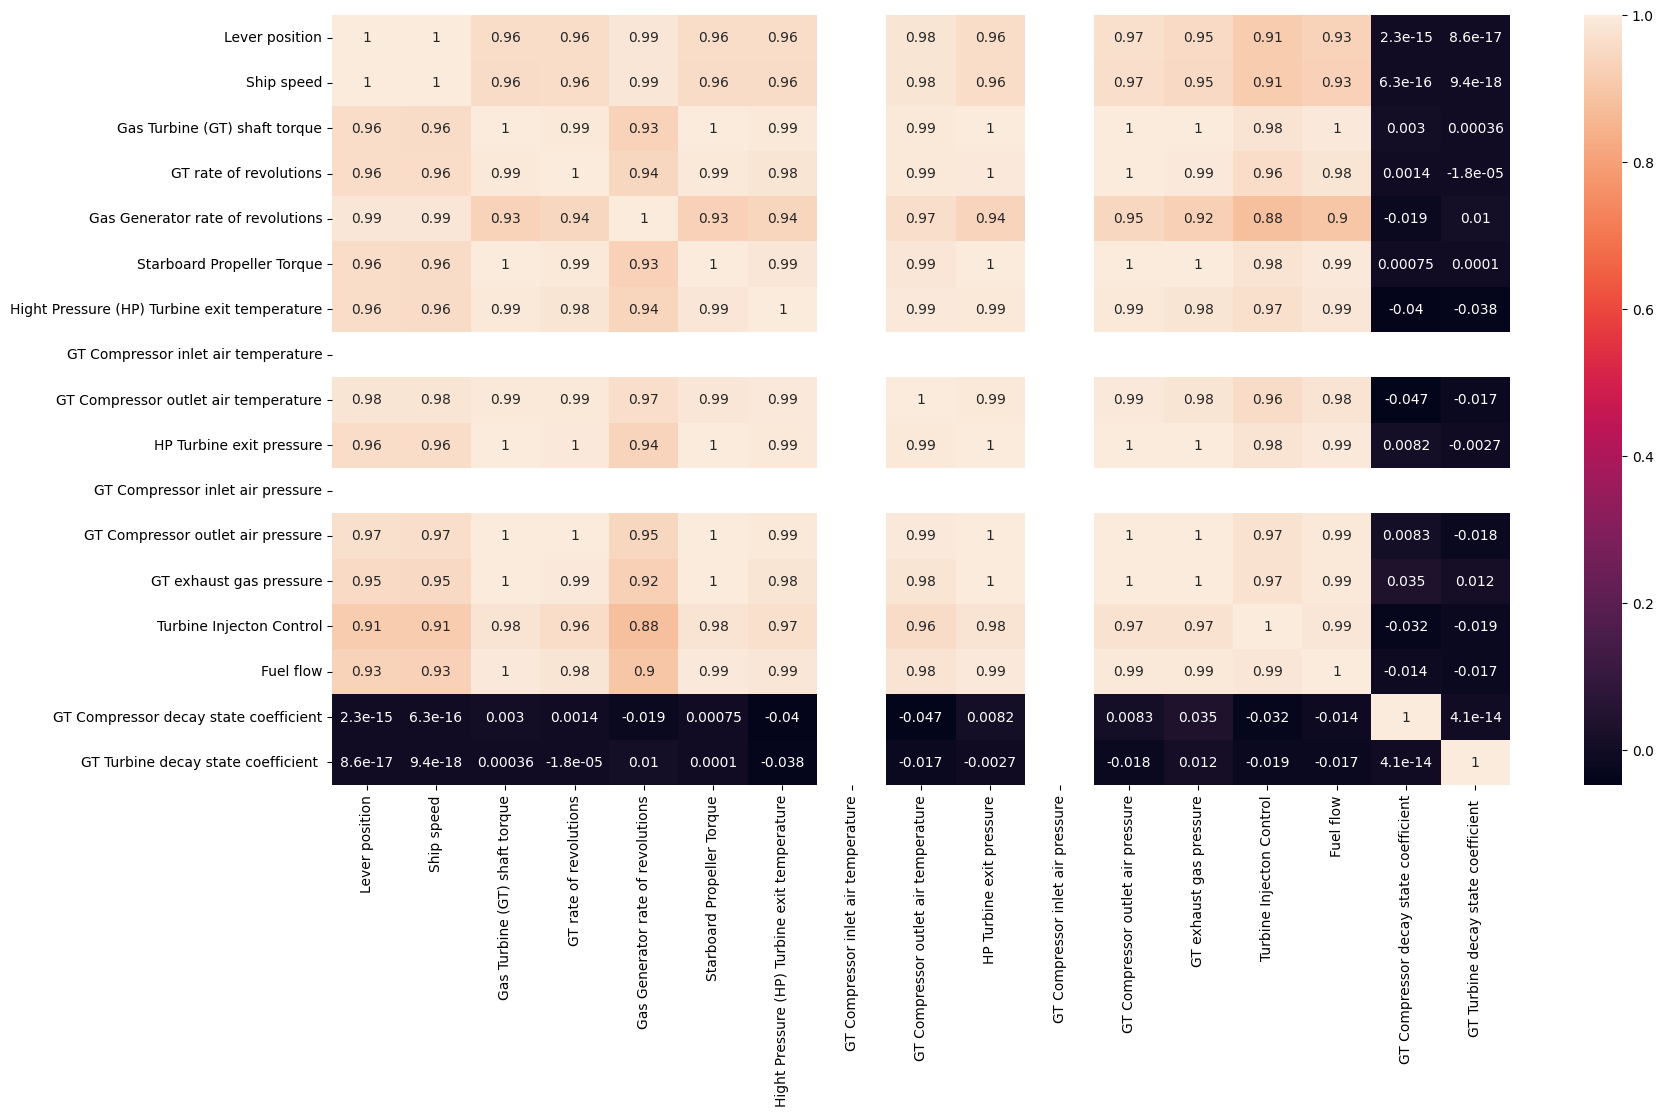

In [ ]:
plt.figure(figsize=[19,10],facecolor='white')
sns.heatmap(df.corr(),annot=True)

#SCATTER PLOT TO SHOW THE RELATION BETWEEN FUEL FLOW AND GT COMPRESSOR DECAY STATE COEFFICIENT

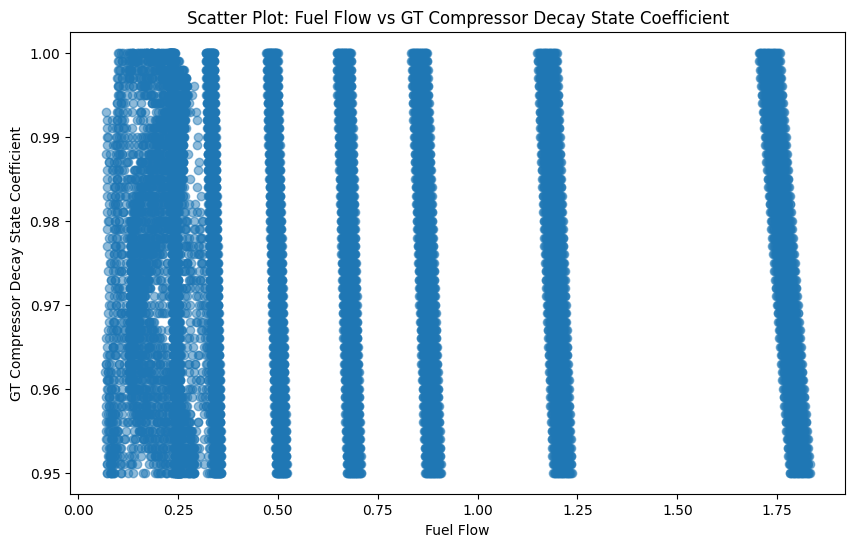

In [ ]:
Fuel_flow = df['Fuel flow']
decay_coefficient = df['GT Compressor decay state coefficient']
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Fuel_flow, decay_coefficient, alpha=0.5)
plt.xlabel('Fuel Flow')
plt.ylabel('GT Compressor Decay State Coefficient')
plt.title('Scatter Plot: Fuel Flow vs GT Compressor Decay State Coefficient')
plt.show()


LINR GRAPH TO SHOW THE RELATION BETWEEN SHIP SPEED ANS GT COMPRESSOR DECAY STATE COEFFICIENT

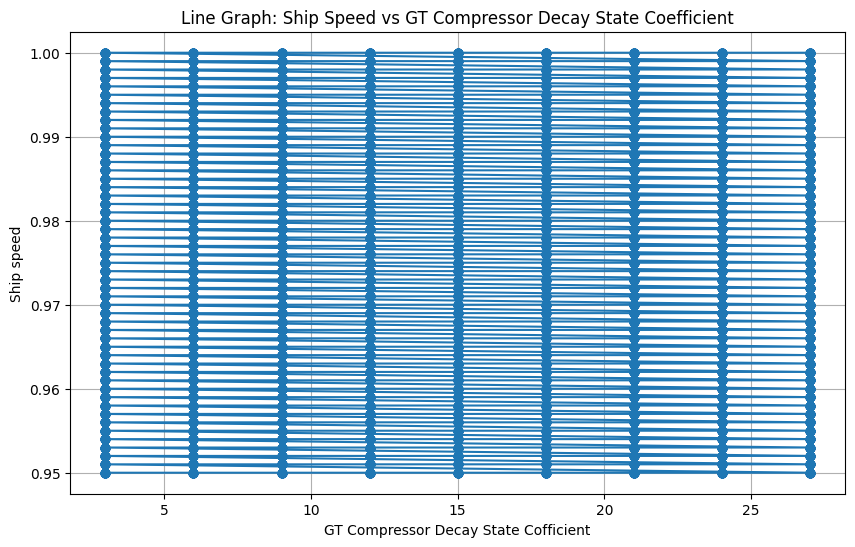

In [ ]:
ship_speed = df['Ship speed']
decay_coefficient = df['GT Compressor decay state coefficient']
plt.figure(figsize=(10, 6))
plt.plot(ship_speed, decay_coefficient, marker='o', linestyle='-')
plt.xlabel('GT Compressor Decay State Cofficient')
plt.ylabel('Ship speed')
plt.title('Line Graph: Ship Speed vs GT Compressor Decay State Coefficient')
plt.grid(True)
plt.show()


BOXPLOT

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Lever position'),
  Text(1, 0, 'Ship speed'),
  Text(2, 0, 'Gas Turbine (GT) shaft torque'),
  Text(3, 0, 'GT rate of revolutions'),
  Text(4, 0, 'Gas Generator rate of revolutions'),
  Text(5, 0, 'Starboard Propeller Torque'),
  Text(6, 0, 'Hight Pressure (HP) Turbine exit temperature'),
  Text(7, 0, 'GT Compressor inlet air temperature'),
  Text(8, 0, 'GT Compressor outlet air temperature'),
  Text(9, 0, 'HP Turbine exit pressure'),
  Text(10, 0, 'GT Compressor inlet air pressure'),
  Text(11, 0, 'GT Compressor outlet air pressure'),
  Text(12, 0, 'GT exhaust gas pressure'),
  Text(13, 0, 'Turbine Injecton Control'),
  Text(14, 0, 'Fuel flow'),
  Text(15, 0, 'GT Compressor decay state coefficient'),
  Text(16, 0, 'GT Turbine decay state coefficient ')])

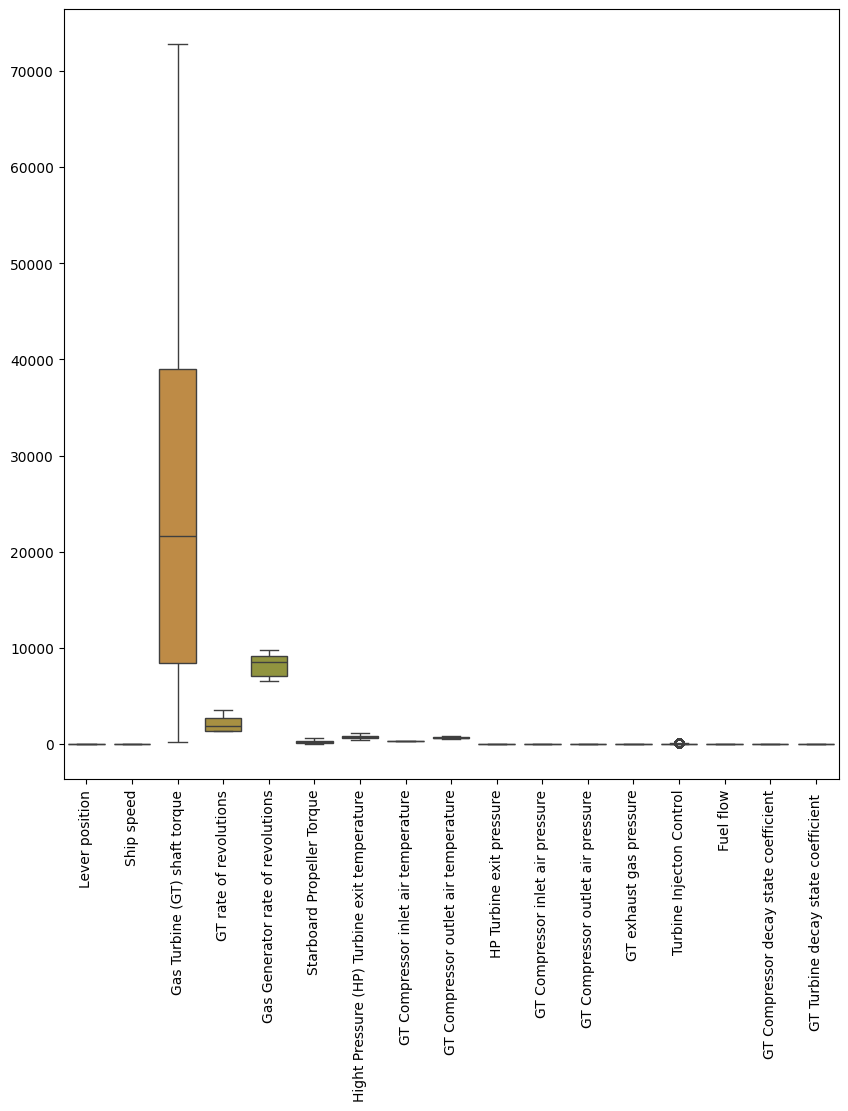

In [ ]:
plt.figure(figsize=(10,10))
p = sns.boxplot(data = df,orient = 'v',width=0.8)
plt.xticks(rotation=90)

HISTOGRAM

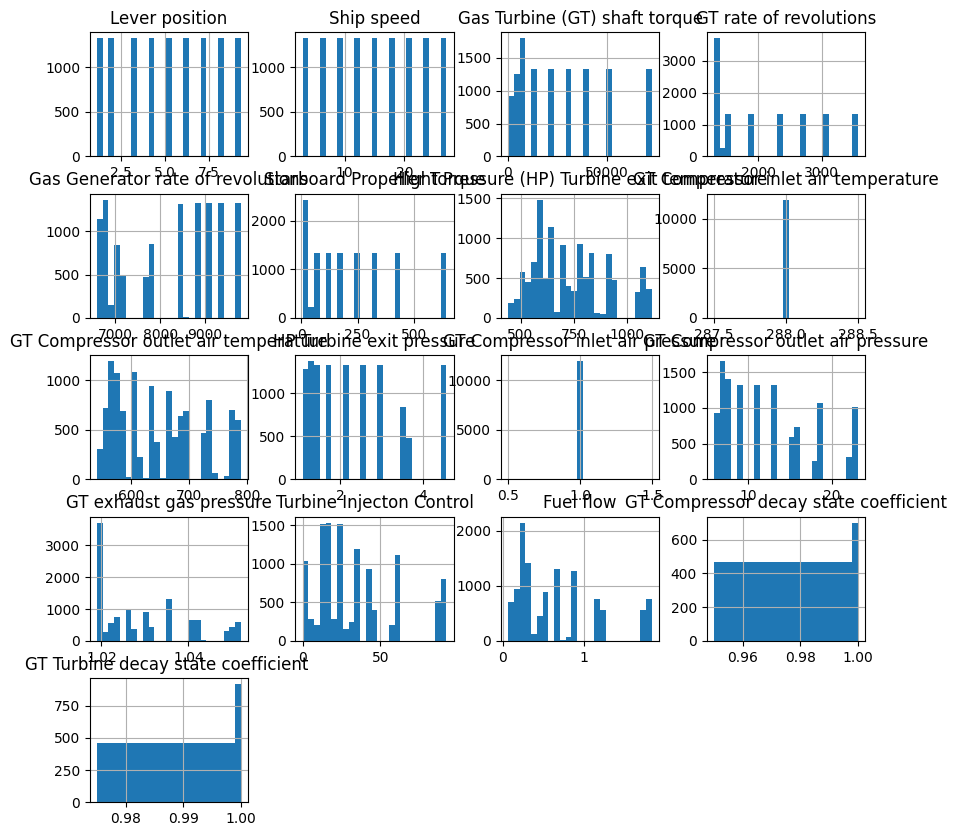

In [ ]:
df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

Kernel Density Estimation (KDE) plot

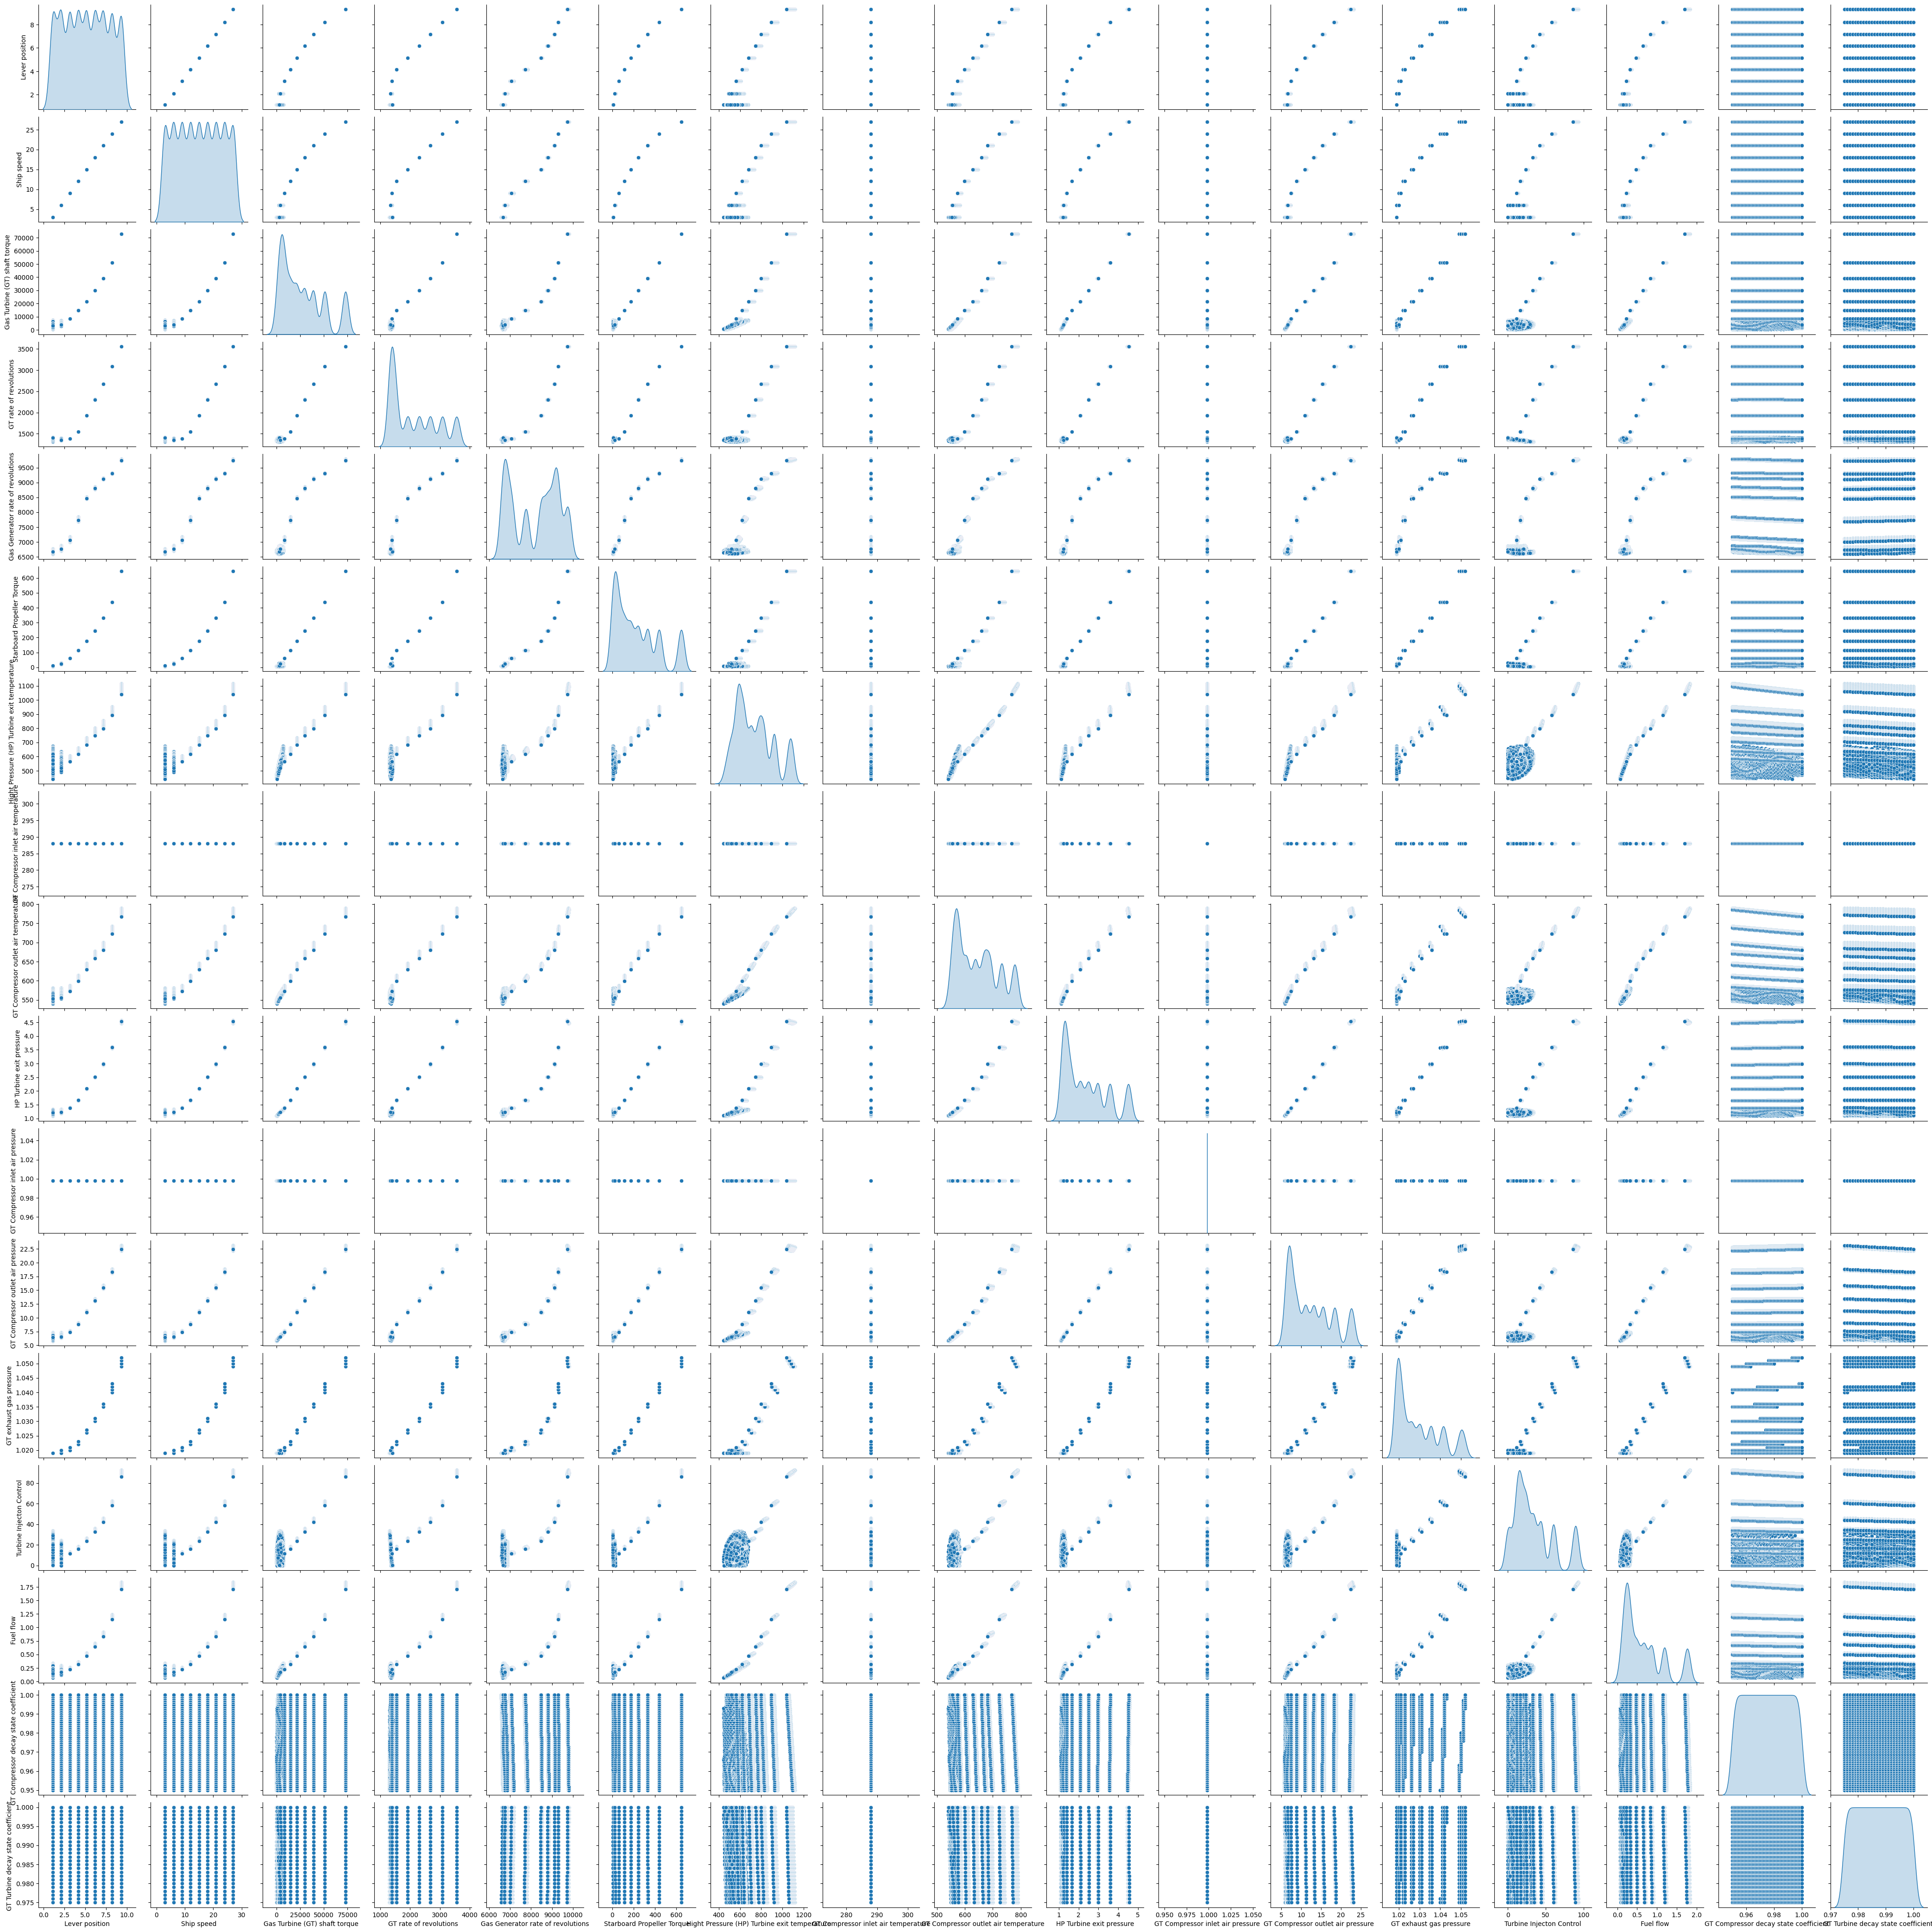

In [ ]:
sns.pairplot(df,diag_kind='kde')
plt.show()

**horizontal**: A pairplot is a grid of scatterplots where each variable is compared to every other variable in the dataset. If horizontal parallel lines are observed in one of these scatterplots, it means that as one variable changes, the other variable remains relatively constant. In other words, there is no discernible relationship or correlation between the two variables.

*Independence*: The variables are statistically independent of each other. Changes in one variable do not affect the other variable.

*Linear Independence*: If the dots form a perfect horizontal line, it means that there is no linear relationship between the two variables. There's no linear equation that can effectively predict one variable based on the other.

**Histograms**: By default, histograms are displayed on the diagonal. Histograms are used to display the frequency or count of values within specific bins. They give an idea of how the values are distributed for each variable.
the default setting (histograms) is being used to show the distribution of each variable. These bar graphs indicate the frequency or count of data points falling into different bins or categories.


Vertical parallel lines
**Positive Linear Relationship**: If the lines are vertically parallel and slope upwards to the right, it indicates a positive linear correlation. As one variable increases, the other variable tends to increase as well.

**Negative Linear Relationship**: If the lines are vertically parallel and slope downwards to the right, it indicates a negative linear correlation. As one variable increases, the other variable tends to decrease.

straight lines that are **neither bending upward nor downward** in a pairplot, it indicates little to no linear correlation or relationship between the two variables being compared.

INDIVIDUAL BOX PLOTS

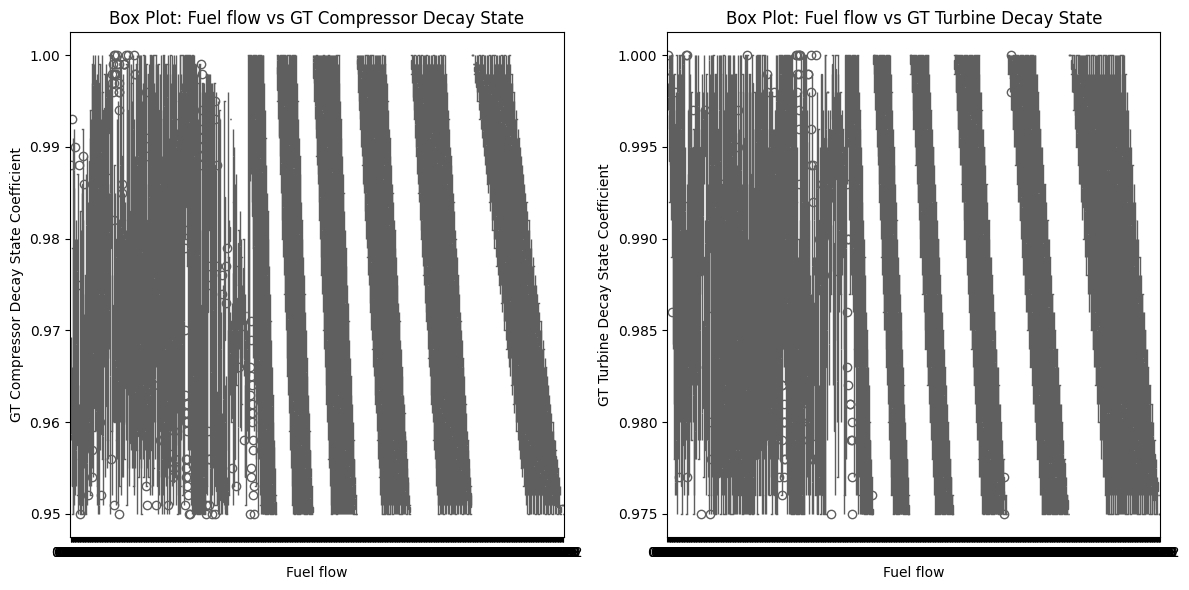

In [ ]:
# Create subplots for the box plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x='Fuel flow', y='GT Compressor decay state coefficient', data=df, ax=axes[0], palette='Set3')
axes[0].set_xlabel('Fuel flow')
axes[0].set_ylabel('GT Compressor Decay State Coefficient')
axes[0].set_title('Box Plot: Fuel flow vs GT Compressor Decay State')

sns.boxplot(x=df['Fuel flow'], y=df['GT Turbine decay state coefficient '], palette='Set3')
axes[1].set_xlabel('Fuel flow')
axes[1].set_ylabel('GT Turbine Decay State Coefficient')
axes[1].set_title('Box Plot: Fuel flow vs GT Turbine Decay State')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

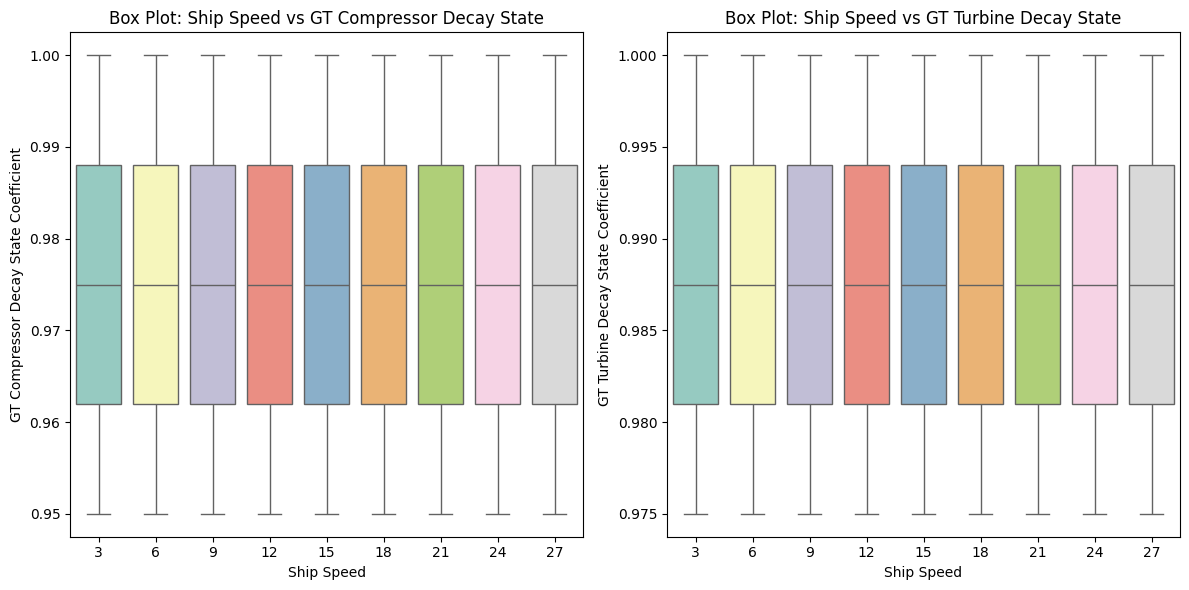

In [ ]:
# Create subplots for the box plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Create the first box plot with 'Ship speed' and 'GT Compressor decay state coefficient'
sns.boxplot(x='Ship speed', y='GT Compressor decay state coefficient', data=df, ax=axes[0], palette='Set3')

axes[0].set_xlabel('Ship Speed')
axes[0].set_ylabel('GT Compressor Decay State Coefficient')
axes[0].set_title('Box Plot: Ship Speed vs GT Compressor Decay State')

# Create the second box plot with 'Ship speed' and 'GT Turbine decay state coefficient'
sns.boxplot(x=df['Ship speed'], y=df['GT Turbine decay state coefficient '], palette='Set3')
axes[1].set_xlabel('Ship Speed')
axes[1].set_ylabel('GT Turbine Decay State Coefficient')
axes[1].set_title('Box Plot: Ship Speed vs GT Turbine Decay State')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

There may be no apparent influence of 'Ship Speed' on 'GT Turbine Decay State' based on the displayed box plots. In other words, 'Ship Speed' levels do not seem to have a substantial impact on the distribution of 'GT Turbine Decay State.'

In [ ]:
df.isna().sum()

Lever position                                  0
Ship speed                                      0
Gas Turbine (GT) shaft torque                   0
GT rate of revolutions                          0
Gas Generator rate of revolutions               0
Starboard Propeller Torque                      0
Hight Pressure (HP) Turbine exit temperature    0
GT Compressor inlet air temperature             0
GT Compressor outlet air temperature            0
HP Turbine exit pressure                        0
GT Compressor inlet air pressure                0
GT Compressor outlet air pressure               0
GT exhaust gas pressure                         0
Turbine Injecton Control                        0
Fuel flow                                       0
GT Compressor decay state coefficient           0
GT Turbine decay state coefficient              0
dtype: int64

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.formula.api as smf

LINEAR REGRESSION

**RATIO:80-20**

In [ ]:


# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure',
    'Turbine Injecton Control', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)


Mean Squared Error (MSE): 3.415745208736195e-05
R-squared (R2) Score: 0.8411075946532245


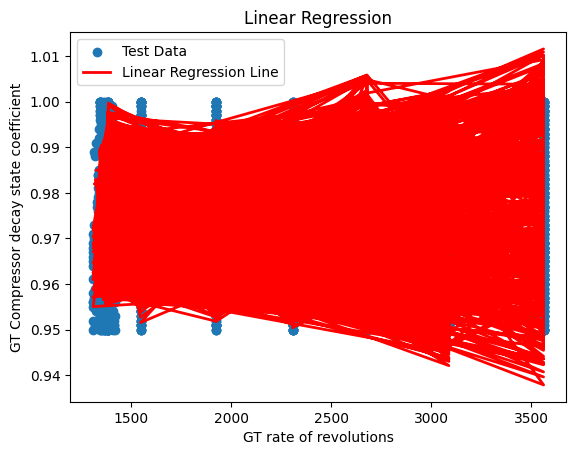

In [ ]:
# Visualize the regression line
plt.scatter(X_test['GT rate of revolutions'], y_test, label='Test Data')
plt.plot(X_test['GT rate of revolutions'], y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('GT rate of revolutions')
plt.ylabel('GT Compressor decay state coefficient')
plt.title('Linear Regression')
plt.legend()
plt.show()

**RATIO: 70-30**

In [ ]:


# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure',
    'Turbine Injecton Control', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)


Mean Squared Error (MSE): 3.458417057204924e-05
R-squared (R2) Score: 0.8395677127219001


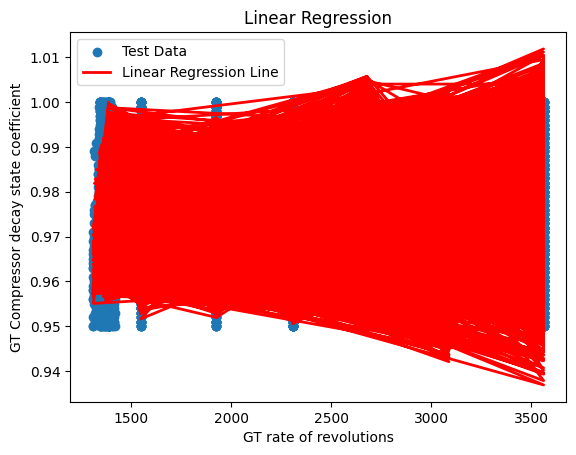

In [ ]:
# Visualize the regression line
plt.scatter(X_test['GT rate of revolutions'], y_test, label='Test Data')
plt.plot(X_test['GT rate of revolutions'], y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('GT rate of revolutions')
plt.ylabel('GT Compressor decay state coefficient')
plt.title('Linear Regression')
plt.legend()
plt.show()

**RATIO: 70-25**

In [ ]:


# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure',
    'Turbine Injecton Control', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)


Mean Squared Error (MSE): 3.485335199168042e-05
R-squared (R2) Score: 0.8373696614560622


**RATIO: 60-40**

In [ ]:


# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure',
    'Turbine Injecton Control', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)


Mean Squared Error (MSE): 3.415745208736195e-05
R-squared (R2) Score: 0.8411075946532245


**DECISION TREE**

**RATIO : 80-20**

In [ ]:


# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a decision tree regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)



Mean Squared Error (MSE): 2.356095517385845e-06
R-squared (R2) Score: 0.9890399997333904


**RATIO: 60-40**


In [ ]:
# Specify the feature columns (X) and target column (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a Decision Tree Regressor and fit it to the training data
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.2056975282781804e-06
R-squared: 0.9851407337308818


**Code to find out max depth values**

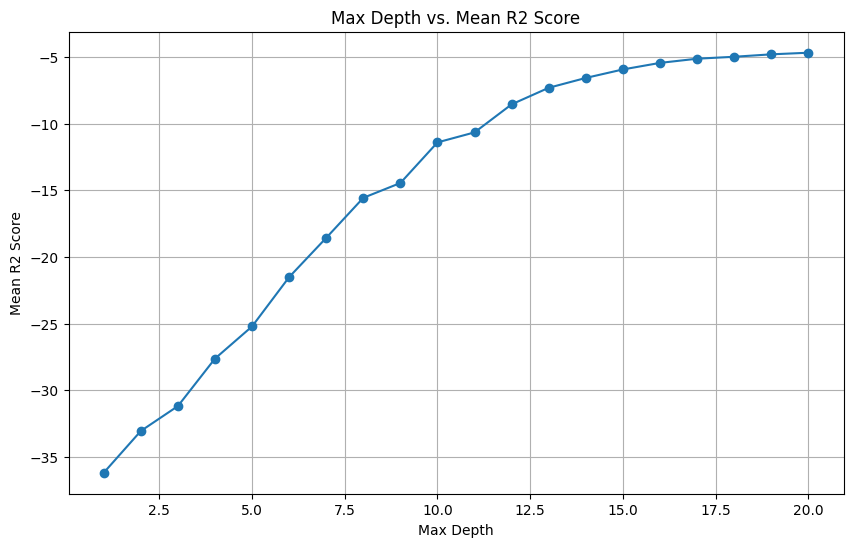

In [ ]:
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure'
    , 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Create lists to store mean scores and corresponding max_depth values
max_depths = list(range(1, 21))  # Try max_depth from 1 to 20
mean_scores = []

# Loop through different max_depth values and compute cross-validation scores
for max_depth in max_depths:
    model = DecisionTreeRegressor(max_depth=max_depth)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # Using R-squared (R2) as the scoring metric
    mean_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mean_scores, marker='o', linestyle='-')
plt.xlabel('Max Depth')
plt.ylabel('Mean R2 Score')
plt.title('Max Depth vs. Mean R2 Score')
plt.grid()
plt.show()


**cross validation to check accuracy for different max depth values**

In [ ]:
# Specify the feature matrix (X) and target variable (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Define the range of max_depth values to test
max_depth_values = [3, 5, 7, 9, 10,11]  # You can adjust the values as needed

# Perform cross-validation for each max_depth value
for max_depth in max_depth_values:
    # Create a Decision Tree Regressor with the current max_depth
    regressor = DecisionTreeRegressor(max_depth=max_depth)

    # Create a KFold object
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust the number of folds and random state

    # Perform cross-validation and calculate the mean R-squared score
    cross_val_scores = cross_val_score(regressor, X, y, cv=kf, scoring='r2')

    # Calculate the mean R-squared score across folds
    mean_r2 = cross_val_scores.mean()

    print(f"max_depth = {max_depth}, Mean R-squared: {mean_r2}")

max_depth = 3, Mean R-squared: 0.22195219985871467
max_depth = 5, Mean R-squared: 0.4133159225450598
max_depth = 7, Mean R-squared: 0.6237305853407429
max_depth = 9, Mean R-squared: 0.8075685882026484
max_depth = 10, Mean R-squared: 0.8654373525488399
max_depth = 11, Mean R-squared: 0.9012009959940567


**TRAINING DATA WITH MAX_DEPTH=11 AND TESTING ON UNSEEN DATA**

In [ ]:
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree regression model with max_depth=11
model = DecisionTreeRegressor(max_depth=11)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)


Mean Squared Error (MSE): 2.0852180183507925e-05
R-squared (R2) Score: 0.9030005792701433


**Training data with max_depth=14 and testing on unseen data**

In [ ]:
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree regression model with max_depth=11
model = DecisionTreeRegressor(max_depth=14)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)

Mean Squared Error (MSE): 8.571989661252401e-06
R-squared (R2) Score: 0.9601251272372266


**RANDOM FOREST**

**Ratio: 75-25**

In [ ]:
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train a Decision Tree regression model with max_depth=11
model = DecisionTreeRegressor(max_depth=11)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)


Mean Squared Error (MSE): 2.294097313611258e-05
R-squared (R2) Score: 0.8929543927785211


**Ratio:80-20**

In [ ]:
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train a Decision Tree regression model with max_depth=11
model = DecisionTreeRegressor(max_depth=11)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)


Mean Squared Error (MSE): 2.2932513117159934e-05
R-squared (R2) Score: 0.8929938683430718


CODE TO VISUALIZE ONE INDIVIDUAL DECISION TREE

In [ ]:
# Create a Random Forest Regressor with max_depth = 11
regressor = RandomForestRegressor(max_depth=11)
# Fit the Random Forest model to your data
regressor.fit(X_train, y_train)  # Assuming you have X_train and y_train


RandomForestRegressor(max_depth=11)

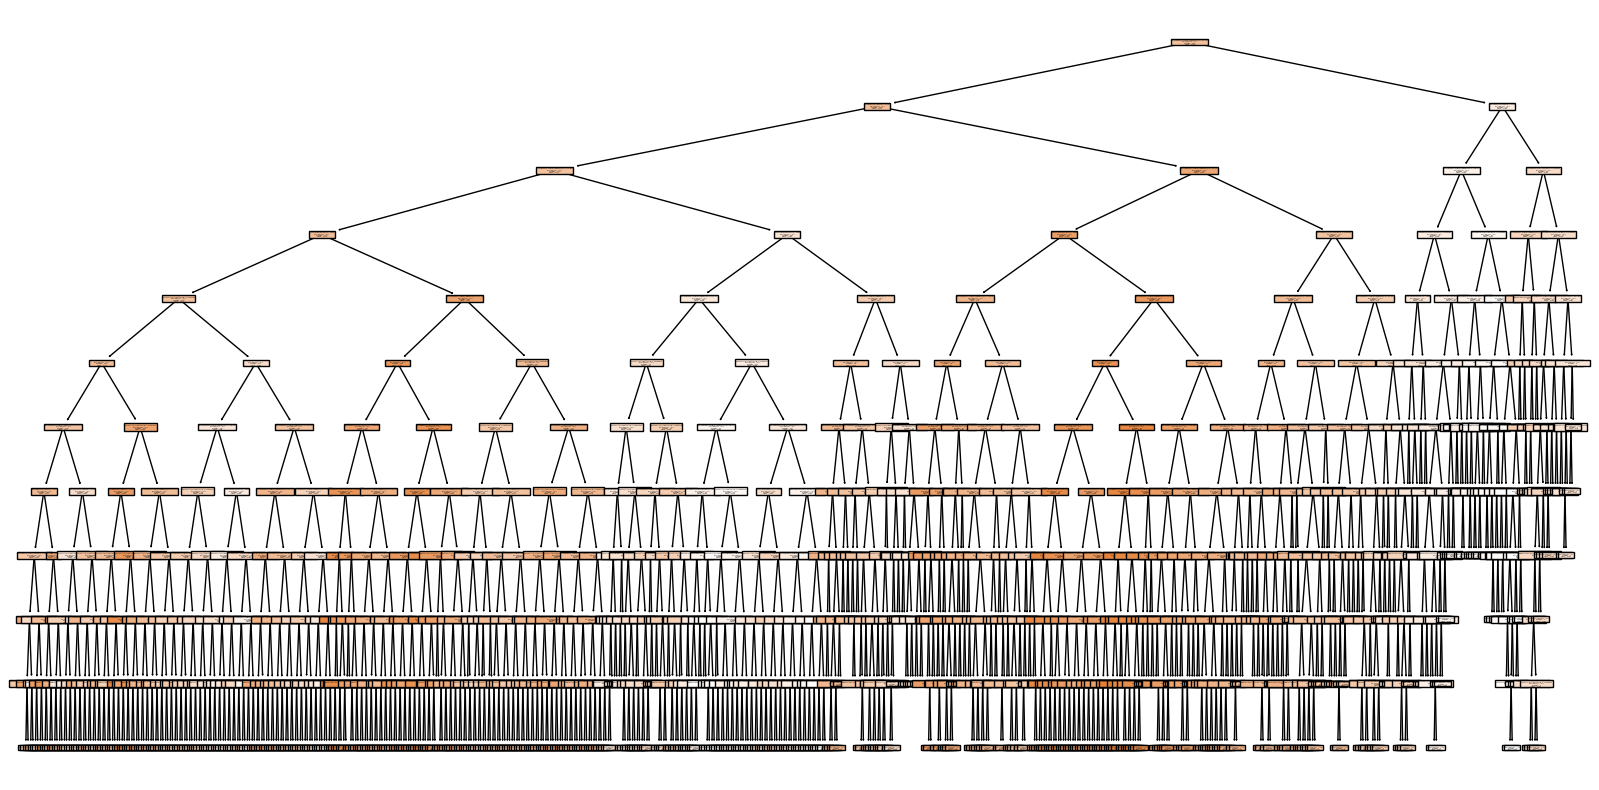

In [ ]:
# Visualize the first tree (you can choose any tree index)
plt.figure(figsize=(20, 10))
plot_tree(regressor.estimators_[0], filled=True, feature_names=X.columns)
plt.show()


**KNN REGRESSION**

cross validation for values of k

In [ ]:
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']].values
y = df['GT Compressor decay state coefficient'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define a range of K values to test
k_values = range(1, 21)

# Initialize variables to store results
best_k = None
best_mse = float('inf')  # Initialize with a large value

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Use 5-fold cross-validation
for k in k_values:
    mse_values = []
    for train_index, val_index in kf.split(X_train):
        knn = KNeighborsRegressor(n_neighbors=k)
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        knn.fit(X_train_fold, y_train_fold)
        y_val_pred = knn.predict(X_val_fold)
        mse = mean_squared_error(y_val_fold, y_val_pred)
        mse_values.append(mse)
    avg_mse = np.mean(mse_values)
    if avg_mse < best_mse:
        best_mse = avg_mse
        best_k = k

print("Best K:", best_k)

Best K: 2


**Ratio: 80-20**

In [ ]:

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a KNN regression model with k=2
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)


Mean Squared Error (MSE): 9.732718894009235e-06
R-squared (R2) Score: 0.9547256887990977


**RATIO:60-40**

In [ ]:

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and train a KNN regression model with k=2
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)

Mean Squared Error (MSE): 1.4809698366150008e-05
R-squared (R2) Score: 0.9313530832379732


**RATIO:70-30**

In [ ]:

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a KNN regression model with k=2
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)

Mean Squared Error (MSE): 1.2548031276179865e-05
R-squared (R2) Score: 0.9417910181109951


**RATIO:75-25**

In [ ]:

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train a KNN regression model with k=2
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)

Mean Squared Error (MSE): 1.0626843163538893e-05
R-squared (R2) Score: 0.9504137478153551


**SVM REGRESSOR**

**Ratio:80-20**

In [ ]:

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an SVM regressor model
model = SVR(kernel='linear')  # You can choose different kernels, such as 'linear', 'poly', 'rbf', etc.
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)


Mean Squared Error (MSE): 0.00021503351487222501
R-squared (R2) Score: -0.0002851594677670821


**Ratio:70-30**

In [ ]:

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train an SVM regressor model
model = SVR(kernel='linear')  # You can choose different kernels, such as 'linear', 'poly', 'rbf', etc.
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)

Mean Squared Error (MSE): 0.00021558698687517496
R-squared (R2) Score: -8.509210081064644e-05


**Ratio:60-40**

In [ ]:

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and train an SVM regressor model
model = SVR(kernel='linear')  # You can choose different kernels, such as 'linear', 'poly', 'rbf', etc.
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)

Mean Squared Error (MSE): 0.00021577838290741565
R-squared (R2) Score: -0.00019057270920264102


**ADA BOOST**

**Ratio:80-20**

In [ ]:

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree regressor with max_depth=11 as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=11)

# Create and train an AdaBoost regressor model with Decision Trees
model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)



Mean Squared Error (MSE): 1.4471625511016097e-06
R-squared (R2) Score: 0.9932681413682671


**Ratio:70-30**

In [ ]:

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree regressor with max_depth=11 as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=11)

# Create and train an AdaBoost regressor model with Decision Trees
model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)


Mean Squared Error (MSE): 1.5985464909373941e-06
R-squared (R2) Score: 0.9925845129254384


**Ratio:60-40**

In [ ]:

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/drive/MyDrive/Unp datasets /Copy of naval_vessel.csv')

# Specify the dependent variable and independent variables
target_variable = 'GT Compressor decay state coefficient'
independent_variables = [
    'Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
    'GT rate of revolutions', 'Gas Generator rate of revolutions',
    'Starboard Propeller Torque', 'Hight Pressure (HP) Turbine exit temperature',
    'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
    'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Fuel flow'
]

# Extract the features (independent variables) and target variable
X = df[independent_variables]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a Decision Tree regressor with max_depth=11 as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=11)

# Create and train an AdaBoost regressor model with Decision Trees
model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):",mse)
print(f"R-squared (R2) Score:",r2)


Mean Squared Error (MSE): 1.8002883861136152e-06
R-squared (R2) Score: 0.991655181359287


**code to visualize data generated data i.e Actual values vs Predicted values**

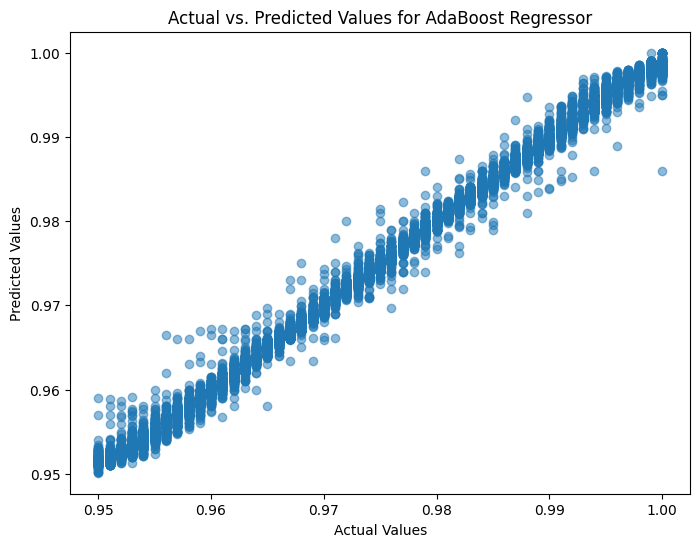

In [ ]:
y_pred = model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for AdaBoost Regressor")
plt.show()

**XG BOOST**

**Ratio:80-20**

In [ ]:
# Define your features (X) and target variable (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and configure the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, max_depth=11, learning_rate=0.1, objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model with mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 9.232141038821893e-07
R-squared (R2) Score: 0.995705425883619


**Ratio:70-30**

In [ ]:
# Define your features (X) and target variable (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and configure the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, max_depth=11, learning_rate=0.1, objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model with mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 1.1747163116109832e-06
R-squared (R2) Score: 0.9945506160287401


**Ratio:60-40**

In [ ]:
# Define your features (X) and target variable (y)
X = df[['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque', 'GT rate of revolutions','Gas Generator rate of revolutions',
           'Starboard Propeller Torque','Hight Pressure (HP) Turbine exit temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
          'GT Compressor outlet air pressure', 'GT exhaust gas pressure', 'Turbine Injecton Control','Fuel flow']]
y = df['GT Compressor decay state coefficient']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and configure the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(n_estimators=100, max_depth=11, learning_rate=0.1, objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model with mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 1.2781202568265166e-06
R-squared (R2) Score: 0.9940755704327664
